# Programming for Data Science 2020
## Homework Assigment Three

Homework Assigment Three focus in the step-by-step implementation of a simple, yet popular, clustering algorithm, the K-Means. Although in most projects you will source algorithms from readily available in implementations found in libraries such as scikit-learn or Keras, in some cases you will need to implement an algorithm yourself. For instance, if such algorithm is not available or if you want to implement a problem-specific modification. In that sense, learning to implement algorithms is an important part of your skillset.

<span style="color:red">Read Carefully The Instructions</span>

<b>Comment your code properly, which includes naming your variables in a meaningful manner. Badly documented code will be penalized.</b>

Your submission will be graded according to the following guidelines:
1. Execution (does your program does what is asked from the exercise?)
2. Objectivity (are you using the adequate libraries?)
3. Readibility of your code (that includes comments, naming of variables, supporting text, etc ...)

In some questions might require that you make critical decisions, or design choices. In such cases, you will be graded according to your ability to justify and support your decisions.

This is an Individual assingment, students that are caught cheating will obtain a score of 0 points.
The Homeworking Assignment Three is worth XX% of your final grade.

The submission package should correspond to a .zip archive (.rar files are not acceptable) with the following files:
1. Jupyter Notebook with the output of all the cells;
2. PDF/HTML print of your Jupyter Notebook;
3. All files outputed as part of the exercises.

The .zip archive filename should be your student ID.

Submission is done through the respective Moodle activity.
Deadline is October 24th at 23:59. 
A penality of 1 point per day late will be applied to late deliveries.

**In Version 02**, red text are additions while yellow text are removals.

Please fill the following fields: <br>
Name: Maikel Sousa <br>
ID: 20200735<br>

## Clustering with K-Means

K-means is one of the simplest clustering algorithms, which you perhaps are already familiar from Data Mining. The K-means Algorithm consists in writing a program that proceeds as follows:

1. Choose value for K (number of clusters);
2. Initialize the locations of the centroids, which we can do by randomly select K points from your dataset as initial locations of the centroids;
3. Calculate distance of all other points to each of the K centroids;
4. Associate each point to the cluster of the closest centroid;
5. Update the centroid position, by computing the average coordinates of all points associated to each cluster;
6. Evaluate the average change in the centroids positions, as a measure of convergence (the algorithm is said to have converged to the solution when the positions of the centroids don't change more than a given tolerance threshold);
7. Repeat steps 3-6 until either the centroids no longer move more than a tolerance threshold or until you repeated these steps at least for specified number of iterations (niter)

The algorithm is thus parametized by the number of clusters (K), the maximum number of iterations (niter), and the tolerance threshold (tol).

### Step 1

Let us star<span style="color:red">t</span> by importing the necessary libraries to execute this homework. <br>
Import numpy, Scipy, and pandas using, respectively, the aliases np, sc, and pd.

<span style="color:red">These are the only libraries you are allowed to use in the remaining of the steps, unless explicitly said the opposite.</span>

In [10]:
import numpy as np
import scipy as sc
import pandas as pd

It is important that we devise a strategy to test our code at each step, in order to assess if it performs as expected. To that end, we have split each step of the algorithm in different blocks, and we ask you to test each block against a simple scenario where the outcome is predictable and can be computed by hand. In some steps, however, we want to pass a more comprehensive data set with similar properties to the real dataset we will be working with.<br>

Such, test datasets try to create realistic conditions in which your algorithm is expected to work correctly, and for which we can also assess if the solution matches our expectation and have a general understanding if the algorithm performs as expected in "real-world" conditions.<br>

For this homework we will resort to a dataset that contains two clearly distinct clusters. We generated the clusters by sampling points from two distinct gaussian distributions with different averages and same standard deviation. <br>
As such, our algorithm should be able to identify each cluster easily, and place the centroids close to the averages of the two distributions. <br>

Run the cell below to download, load the data into a numpy array, and visualize your Test dataset.<br>
You will run your algorithm implementation against this dataset as a proof of work.

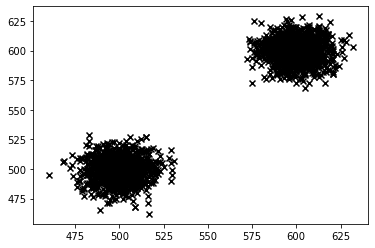

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# download the file into a dataframes and convert it to a numpy array.
data_test = pd.read_csv("https://www.dropbox.com/s/gax1l68jsarxqt9/data_test.txt?dl=1", header=None).to_numpy()

#plot the points into a scatter plot
plt.scatter(data_test[:, 0], data_test[:,1], color ='k', marker='x')

### Step 2 

Write a function named <b>init</b> that takes two arguments: $points$ and $K$. <br>
The function <b>init</b> should return a numpy ndarray with  $K$ elements sampled randomly and without replacement <span style="color:red">from</span> $points$. Meaning, the same point <span style="color:red">should not be</span> picked up twice. <br>

**Show that your function performs as desired by calling it with** $K = 2$ **and <span style="color:red">on the</span> data_test as the** $points$.

In [12]:
#Creating the function

def init(points, K):
    K = int(K)
    
    #creating a numpy array with the needed shape given by the variables K and points.
    output = np.zeros( [ K, points.shape[1] ] )
    
    # Now, I will use np.random.randint() to generate a random number between 0 and the number of rows in the variable
    # "points" with size K. This variable will randomly pick the rows from "points" we should extract:
    selector = np.random.randint(low = 0, high = points.shape[0], size = K)
    
    # The variable unique below will store a numpy ndarray with the distinct values inside selector to avoid getting
    # duplicated values inside selector
    unique = np.unique(selector)
    
    # Creating a while loop to make sure that each value inside selector is unique and therefore the elements selected from
    # "points" won't be repeated as well.
    while ( selector.shape != unique.shape ):
        selector = np.random.randint(low = 0, high = points.shape[0], size = K)
        unique = np.unique(selector)
    
    # We will populate the output numpy ndarray with the values from points using the selector:
    for i, element in enumerate(selector):
        #print('i=', i)
        #print('element=', element,'\n')
        output[i] = points[element]
    
    #print(selector , sep='\n\n')
    
    return output

In [13]:
#Testing the function
init(data_test, 2)

array([[496., 506.],
       [593., 591.]])

### Step 3

Write a function named <b>distance</b> that takes two arguments: $p1$ and $p2$. <br>
The function <b>distance</b> should return a scalar that corresponds to the euclidean distance between points $p1$ and $p2$, that should have a ndarray format. <br> 
Assume that $p1$ and $p2$ are two ndarrays of the same size.

Recall that the euclidian distance (d) between two points ($p_1$ and $p_2$) in a 2-dimensional space is given by:<br><br>
\begin{equation}
    d(p_1, p_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 }
\end{equation}<br>
where $p_1 = \{x_1,y_1\}$ and  $p_2 = \{x_2,y_2\}$. <br>


**1) Test that your function works by computing the distance between p1=(1,3) and p2=(7,2), which is $\approx$ 6.08.**<br>
**Consider using the existing Numpy or Scipy packages for this task.**

Can you write a function that computes the euclidean distance between two points of arbitrary dimension? <br>
In general, for arbitrary dimensionality the square of the distance can be computed as:<br><br>
\begin{equation}
    d^2(p_1, p_2) = \sum_{i=0}^{D-1} (x_i-y_i)^2
\end{equation}<br>
where $p_1 = \{x_1,x_2,...,x_{D-1}, x_D\}$ and $p_2 = \{y_1,y_2,...,y_{D-1},y_D\}$.<br>

**2) Show that your function works by computing the distance between (1,3,-9,12) and (7,2,0,5)**

***1)***

I will use the defined numpy function (np.linalg.norm) for the euclidean distance, I will explicitly set the parameter ord=2 since it is a particular case of the generalized Minkowski metric (https://en.wikipedia.org/wiki/Minkowski_distance)

In [14]:
def distance(p1, p2):
    return np.linalg.norm(p2-p1, ord = 2)#round(np.linalg.norm(p2-p1, ord = 2),2)

Geometrically, p2-p1 is the vector that goes from the vector p1 to the vector p2, and the module of that vector will tell us the distance between p2 and p1, that's why we set p2-p1 as the parameter in _np.linalg.norm_

And, although, we could round the distance to avoid long decimals we will keep as much of them to reduce the error in the following steps.

In [15]:
# Test variables do not change
p1 = np.array([1,3])
p2 = np.array([7,2])

In [16]:
distance(p1,p2)

6.082762530298219

***2)***

In [17]:
#Test variables, do not change the values
p1 = np.array([1,3,-9,12])
p2 = np.array([7,2,0,5])

In [18]:
distance(p1,p2)

12.922847983320086

### Step 4

Write a function named <b>centroid</b> that takes one argument: $points$.<br>
The argument $points$ should be a ndarray with the coordinates of a set of observations.<br>
The function <b>centroid</b> should return an ndarray with $d$ values <span style="color:red">(being $d$ the number of dimensions)</span>, the $n^{th}$ index of the <span style="color:red">returned</span> <span style="color:yellow">output</span> ndarray should <span style="color:red">thus</span> correspond to the averaged of the values in the $n^{th}$ column of the points ndarray. <span style="color:red">In other words, correspond to the average position along a specific dimension of observations in $points$.</span>

**Test your function and check that is works by using the ndarray TEST**


In [19]:
def centroid(points):
    return points.mean(axis = 1)

In [20]:
#Test variables do not change the values
TEST = np.array([[1,2,3,4,5],[0,0,1,1,1],[0,1,2,4,5]])
print(TEST)

[[1 2 3 4 5]
 [0 0 1 1 1]
 [0 1 2 4 5]]


In [21]:
centroid(TEST)

array([3. , 0.6, 2.4])

### Step 5

Write a function <b>cupdate</b> that takes two input arguments: <i>points</i> and <i>clusters</i><br> 
The argument <i>points</i> is a ndarray containing the coordinates of a set of points (1 point per row).<br>
The argument <i>clusters</i> is a 1-dimensional ndarray that indicates the cluster to which each point is associated.<br>
Note that values in <i>clusters</i> are integers and can only take values between 0 and K-1, where K is the <span style="color:red">total</span> number of clusters.

The function <b>cupdate</b> should return an ndarray with the average coordinates of the points associated to each cluster, that is the centroid of each cluster. The returned array should have the same number of columns as <span style="color:yellow">points</span> <span style="color:red">dimensions</span> and <span style="color:yellow">length</span> K <span style="color:red">rows</span>.

**Test your function and report the centroids generated by passing p and c as inputs with k = 3. Save these centroids as a variable: cen**

In [22]:
def cupdate(points, clusters):
    # Creating an array where we will have in each element the tag for the number of the cluster, this variable will be
    # used to filter out the variable "points" only in the clusters that we need:
    unique_clusters = np.unique(clusters)
    
    # Creating a numpy array with the needed shape given by the len of the cluster.
    output = np.zeros( [len(unique_clusters),len(points[0])] )
    
    #print(output)
    
    # Calculating the centroid:
    for i, n in enumerate(unique_clusters):
        # It is done in three steps:
        
            # 1) Filtering "points" using the elements in "unique_clusters" (n)
            
            # 2) Trasposing the elements of that filtered numpy array, by doing this all coordinates (x1,y1,z1,...) of the
            #    elements in cluster n are grouped in each element of the resulting numpy array, ie, having each 
            #    coordinate grouped in the columns.
            
            # 3) using the centroid function defined before:

        output[i] = centroid(points[clusters == n].T)

    return output

In [23]:
# Tesst variables, do not change the values
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = np.array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [24]:
cen = cupdate(p,c)

cen

array([[0.44995487, 0.55986467],
       [0.53760985, 0.53912646],
       [0.8922063 , 0.26672425]])

### Step 6

Write a function <b>pupdate</b> that takes two input arguments: $points$ and $centroids$.<br>
The function <b>pupdate</b> should return a one-dimensiona ndarray that indicates the index of the centroid that is closer to each point. To determine the distance between a centroid and a point you can use your distance function you created earlier. <br>

You will need to assess the distance between each point to each centroid. Different approaches can be taken to do this. For instance, you can start by computing a d by k distance matrix matrix between each of the $d$ points and the $k$ centroids.

**Test your function by calling it and passing the array p (as defined above) with the output of cupdate, cen, as arguments. You should get an output that looks like c defined above (but is not exactly the same, can you see why). Print this result and save it in a variable called new_clusters**

I will create a helper function that will output a matrix with the distance of each point to each one of the centroids:

In [25]:
def distancematrix(points, centroids):
    # For each point we want the distance to every centroid, these two for loops will create a distance matrix that 
    # will contain in the rows the distance for each centroid using the function distance defined before.
    
    # Defining the required output:
    distance_matrix = np.zeros([len(points), len(centroids)])
    
    # Iterating through the points
    for p_i, point in enumerate(points):
        
        # Iterating through the centroids
        for c_i, center in enumerate(centroids):
            
            #using our distance function
            distance_matrix[p_i,c_i] = distance(point, center)
    
    return distance_matrix

In [26]:
def pupdate(points, centroids):
    
    # Susing our helper function:
    distance_matrix = distancematrix(points, centroids)
    
    # Now that we have the distance matrix we need to know the index where we have the min...
    
    # Defining numpy array that will contain the index with the minimal distance
    min_index = np.zeros(len(distance_matrix))
    
    # Let's loop through the distances of each point to the centroids:
    for i, distances_to_clusters in enumerate(distance_matrix):
        
        # The minimal distance for each point to all the centroids is stored:
        row_MIN = min(distances_to_clusters)
        
        # Looping through the distances:
        for j, distances in enumerate(distances_to_clusters):
            
            # Condition to verify when we have the minimal distance and we assign in that position the corresponding index:
            if ( row_MIN == distances ):
                min_index[i] = int(j)
    
    return min_index.astype(int)

In [27]:
new_clusters = pupdate(p,cen)

print(c, new_clusters, sep = '\n')

[2 0 0 1 1 0 0 1 0 1]
[2 0 0 1 2 0 1 1 0 0]


### Step 7

Write a function <b>error</b> that takes two input arguments: oldcentroids and newcentroids.<br>
The argument oldcentroids corresponds to a ndarray with centroid positions from the previous iteration, and newcentroids to a ndarray with the newly computed centroid positions from the current iteration. <br>

The function <b>error</b> should return the average euclidian distance <span style="color:yellow">(the square error)</span> between the old and new positions of each centroid.  <span style="color:yellow">This will give us a quantity that tell us whetherour algorithm is still converging to the solution or  got to good approximation.</span> <span style="color:red"> We will use the function error to obtain an estimate of whether the algorithm is still converging to the solution (that is the centroids are, in average, moving a lot) or if we entered a scneario of small steps (that is the centroids are, in average, not moving that much). In that sense, the name of the function (error) was an unfortunate decision from our part.</span> We will use <span style="color:red"> this information combined with</span> a tolerance threshold in regards to the average change in the centroids positions to <span style="color:red">decide if it is a good time to stop the algorithm</span> <span style="color:yellow">make this decision</span> 


**Test your function then report the distance between the centroids calculated in Step 5, cen, and the centroids that you can calculate using the function cupdate with the arguments points and new_clusters.**

In [28]:
def error(oldcentroids, newcentroids):
    
    # Let's create a cero numpy array that will store the distances between each cluster
    distances = np.zeros(len(oldcentroids))
    
    # Iterating between each cluster to get the distance
    for i, c_old in enumerate(oldcentroids):
        
        #computing the distance between each cluster and it's 
        distances[i] = distance(c_old, newcentroids[i])
    
    # since we get the distance between each centroid on the "distances" array we compute the average of that array
    # to get the average euclidan distance between the old centroid and the new centroid

    return distances.mean()

In [29]:
newcentroids = cupdate(p, new_clusters)

error(cen, newcentroids)

0.17635560837965428

Let's see, in a graph, how the centroids changed:

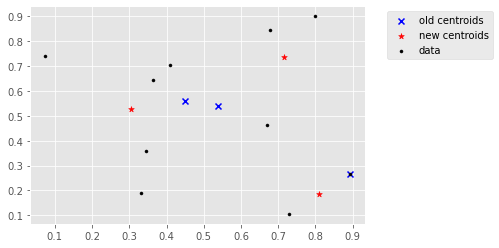

In [80]:
plt.scatter(cen[:, 0], cen[:,1], color ='blue', marker='x', label="old centroids") 
plt.scatter(newcentroids[:, 0], newcentroids[:,1], color ='red', marker='*', label="new centroids")
plt.scatter(p[:, 0], p[:,1], color ='black', marker='.', label="data")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

As you see in the graph, one of the old centroids (blue) has the same coordinates as one of the points in p and the other two are really close to each other, but the new centroids (red) are located at a better distance to the rest of the points.

### Step 8

Write a wrapper function called <b>kmeans</b> that takes the following arguments:
- $points$, which is a ndarray of points;
- $K$, the number of clusters, set the default value to two;
- $niter$, the number of iterations;
- $tol$, the error tolerance threshold below which your algorithm should stop

The function should return:
- A one dimensional ndarray with the cluster of associated to each point,
- A ndarray with the location of the K centroids.

Use the functions you prepared in the previous to assemble the function <b>kmeans</b>. <br>
Use the tolerance as a treshold to stop the algorithm, for instance by evaluating if the average variation in the distance between the new and previous coordinates of the centroids is below the tolerance level. If yes, then you can stop the algorithm and return the outputs. <br>

<span style="color:yellow">You will need to make some decisions about the best approach to select the correct range of values to pass to init(). Explain how you did it.</span>

**Note: A common issue with the K-means algorithm is that in some limiting conditions it might lead to empty clusters. In that case it is expected that your algorithm to return errors. Although that is not expected to happen with the examples provided, you might want to consider implementing some heuristics to overcome those errors. However, such is an optional task, and for this homework if you bump into such errors we recommend you try to rerun your code.**

In [30]:
def kmeans(points, niter, tol, K=2):
    
    # 2) Random Initial position for the centroids  
    centroids = init(points, K)
    
    #print(centroids)
    
    # 3 + 4 ) Calculating the distance of all points to the centroids and asociating the cluster to the closest centroid:
    first_clusters = pupdate(points, centroids)
    #print('First, before the while:\n', first_clusters)
    
    # 5) Updating the cluster position
    
    new_centroids = cupdate(points, first_clusters)
    #print('First, before the while:\n', new_centroids)
    
    # 6) Getting the error:
    
    err = error(centroids, new_centroids)
    #print('First, before the while:\n', err, '\n\n')
    
    # 7) Setting the tolerance error:
    
    i = 0
    while (err > tol and i < niter): #and i < niter
        
        centroids = new_centroids
        
        first_clusters = pupdate(points, centroids)
        #print('Step 1:', first_clusters, sep='\n')
        
        new_centroids = cupdate(points, first_clusters)
        #print('Step 2:', new_centroids, sep='\n')
        
        err = error(centroids, new_centroids)
        #print(err, '\n')
        
        i += 1
        
    if ( len(np.unique(first_clusters)) != len(range(K)) ):
        print('One of the clusters is empty')
    
    #print('iterations done:', i)
    
    return first_clusters, new_centroids #(clusters_asociated, new_clusters)

In [31]:
#testing our function:
kmeans(p, 10, 0.0001)

(array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0]),
 array([[0.36733096, 0.58116761],
        [0.77210856, 0.43388695]]))

It is useful to visually inspect the results in order to assess the performance of the clustering algorthim. <br>
Below is an example of how you can visualize your results for a sample dataset. <br>
Can you adapt the code to show your results applied to data_test with K = 2, niter = 500, tol = 0.00001.

<span style="color:red">**In this step feel free to use any other visualization library such as Seaborn.**</span>

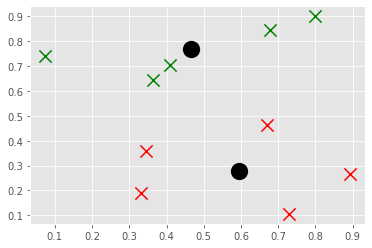

In [41]:
#boilerplate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# let us define the style of the plot here
style.use('ggplot')
colors = ["g","r","c","b"]

# sample data for this example
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
centroids = [np.array([0.46519213, 0.76779111]),np.array([0.59329188, 0.27671958])]
clusters = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# plot each point in the centroids array
for centroid in centroids:
    plt.scatter(centroid[0],centroid[1], marker="o", color="k", s=150, linewidths=5)

# plot each point in the points array, colored according to the cluster they belong
for i in range(len(clusters)):
    plt.scatter(p[i,0],p[i,1], marker="x", color=colors[clusters[i]], s=150, linewidths=5)

# plot all elements
plt.show()

Let's plot our data with the conditions required by the excercise, but first, let's set those conditions:

In [54]:
K = 2
niter = 500
tol = 0.00001
(clusters , centroids) = kmeans(data_test, niter, tol, K)

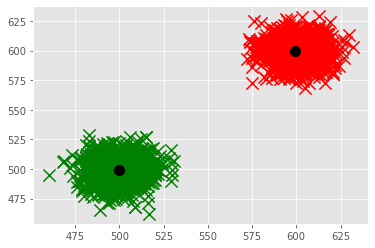

In [55]:
# let us define the style of the plot here
style.use('ggplot')
colors = ["g","r","c","b"]

# plot each point in the points array, colored according to the cluster they belong
for i in range(len(clusters)):
    plt.scatter(data_test[i,0],data_test[i,1], marker="x", color=colors[clusters[i]], s=150, linewidths=5)
    
# plot each point in the centroids array
for centroid in centroids:
    plt.scatter(centroid[0],centroid[1], marker=".", color="k", s=150, linewidths=5)

# plot all elements
plt.show()

### Step 9

Write a function <b>inertia</b> that takes three input arguments: $points$, $clusters$, and $centroids$.<br>
Where $points$ is an 2-dimensional ndarray with the coordinates of each point in your dataset, clusters is a vector that indicates the cluster of each point (takes values between $0$ and $K-1$), and $centroids$ is a 2-dimensional ndarray with length $k$ of the coordinates of the centroids.

The function should return a tuple in which the first value is the number of clusters and the second is the computed **average squared <span style="color:red">Euclidean</span> distance** of the points to the centroid of the cluster they are assigned.
<span style="color:red">The Squared of the Euclidean distance is a common measure of error that satisfies several important properties, namely it is strictly convex and smooth. It is often used in the method of Least Squares to fit linear functions to data, in which we try to find the parameters of a linear model that minimize the average of the square distances between the observed values and the values predicted by the fitted model. Here we are borrowing these concepts to measure the dispersion of points in a cluster, in other words, the error between the position of the centroid and the locations of the points associated with it.</span>

**Test your function and report the results of using point=p, clusters=c, and centroids=cen. These are the <span style="color:red">variables that you have used in the previous steps</span>**
<span style="color:red">**Note: distance always refers to the euclidean distance.**</span>

In [107]:
def inertia(points, clusters, centroids):
    
    # The number of clusters is giving by the following variable, the unique numbers inside the clusters variable:
    n_clusters = len(np.unique(clusters))
    
    # Let's create a variable to store the square of the distances of each point to it's cluster:
    
    distances = np.zeros([1,2])
    
    # We need to call out our distancematrix function for each of the clusters they are assigned to:
    for n in range(n_clusters):
        
        #print(n)
        #print(points[clusters == n])
        #print(centroids[n])
        distance_matrix = distancematrix(points[clusters == n], centroids[n])
    
        #print('The shape of our distance matrix from each point to each cluster is:', distance_matrix, sep='\n')
        # By removing the comment of the print statement above, when the function is runned for p, we can check that one 
        # of the points in p is, in fact, one of the centroids as we saw some lines above in a plot.
    
        # To get the square of that distance we just need to square the distance matrix:
    
        distance_matrix = np.square(distance_matrix)
    
        distances = np.append(distances, distance_matrix)
    
    # Now, we return the average of the square of the distances as an output, and for that we just use the numpy 
    # method mean distances but first filtering out the first record that we inizialized with 0's
    
    return n_clusters, distances[2:].mean()

In [108]:
inertia(p,c,cen)

(3, 0.15470587966772326)

### Step 10

Load the data from file https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1 into numpy array.<br>
The data consists of the coordinates of $N$ points in a 2-dimensional space. <br>
Use the functions <b>kmeans</b> and <b>internia</b> to identify the most suitable number of clusters. <br>
You might want to consider doing some visual inspection and reporting. <br>
For instance, inspect visually the dataset before performing the clustering; report the inertia values as a line plot; show the result of your clustering.

Tip: use the output of inertia to perform the elbow method https://en.wikipedia.org/wiki/Elbow_method_(clustering).

In [109]:
# Loading or data
data = pd.read_csv("https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1", header=None).to_numpy()

# Visualizing:
data

array([[664159, 550946],
       [665845, 557965],
       [597173, 575538],
       ...,
       [650661, 861267],
       [599647, 858702],
       [684091, 842566]], dtype=int64)

In [84]:
# Let's start inspecting our data:
data.shape

(5000, 2)

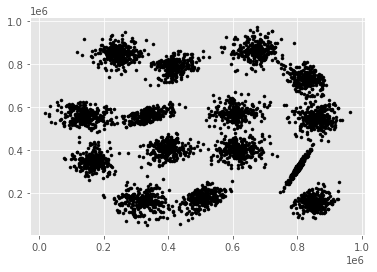

In [60]:
# Let's do a visual inspection of the data:

plt.scatter(data[:, 0], data[:,1], color ='k', marker='.')

Visually, seems that the data is distributed on 15 small groups. Let's try to cluster them by using K=16

In [110]:
#kmeans(points, niter, tol, K=2)
niter = 20
tol = 0.001
K = 15

(clusters , centroids) = kmeans(data, niter, tol, K)

Now that we have our clusters let's plot them, but first, let's create a helper function that assigns colors to the points that belong to each cluster:

In [111]:
def plotting_clustersVScentroids(data, clusters, centroids):
    # Importing libraries to manage the colors for a better visualization
    from matplotlib import cm
    from matplotlib.colors import ListedColormap, LinearSegmentedColormap
    
    # Let's create a color for each cluster
    n_clusters = np.unique(clusters)
    n_colors = (n_clusters + 0.9)/len(n_clusters)
    viridis = cm.get_cmap('viridis', 15)

    # let us define the style of the plot here
    style.use('ggplot')
    #colors = ["g","r","c","b","k"]

    # plot each point in the points array, colored according to the cluster they belong
    for j in n_clusters:
        tobeplotted = data[clusters == j]
        for i in range(len(tobeplotted)):
            plt.scatter(tobeplotted[i,0],tobeplotted[i,1], marker="x", color = viridis(n_colors[j]) , s=150, linewidths=5)
    
    #for i in range(len(clusters)):
        #plt.scatter(data[i,0],data[i,1], marker="x", color = viridis(0.56) , s=150, linewidths=5)

    # plot each point in the centroids array
    for centroid in centroids:
        plt.scatter(centroid[0],centroid[1], marker=".", color="k", s=150, linewidths=5)

    # plot all elements
    plt.show()

Let's visualize out clustering and the clustering of the data:

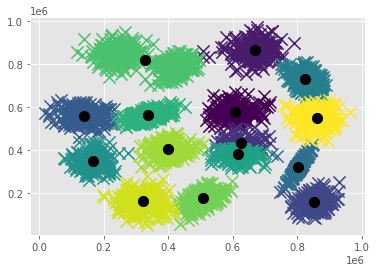

In [93]:
plotting_clustersVScentroids(data, clusters, centroids)

Our inertia method has the following result:

In [112]:
inertia(data, clusters, centroids)

(15, 119847727953.97835)

As we see above the clustering works quite well for some group of points but not so much for others, if we want to understand what would be a good value for the variable K in order to reduce the inertia we need to do some testing.

For that lets define a range for our "K" value and save the inertia results for each iteration of K:

In [119]:
K1 = range(2,21)
niter = 15
tol = 0.001

elbow = []

for K in K1:
    (clusters , centroids) = kmeans(data, niter, tol, K)
    elbow.append( inertia(data, clusters, centroids) )

elbow = np.array(elbow)

Let's plot our error data:

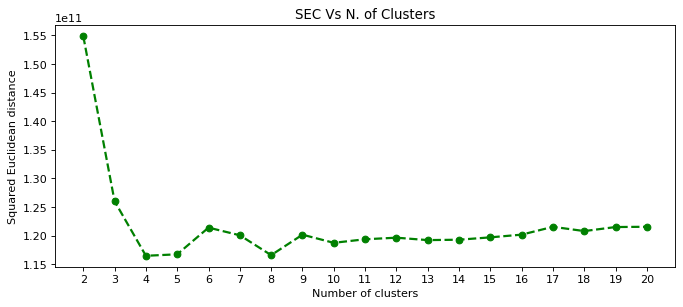

In [120]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')

plt.plot(elbow[:,0], elbow[:,1], color='green', marker='.', linestyle='dashed', linewidth=2, markersize=12)
plt.xticks(ticks=elbow[:,0])
plt.title('SEC Vs N. of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Squared Euclidean distance')
plt.show()

We see in the graph above that from K=13 the squared distance starts to slowly increase. 

For some values of K we hit a low in magnitude of the square euclidean distance, such is the case for:

* K = 4
* K = 5
* K = 8

If we want to reduce the ammount of clusters to use the first two cases above would be the best choice for this.

<i> <b> Thank you for reading my work. I was able to find my bug after the Professional DS lounge on Zoom. I'm delighted on how all the classes went and the support recieved to clarify any doubts throughout the course. Wish you all the best. </b> </i>

<div style="text-align: right"> <i> <b> Kind regards, Maikel. </b> </i> </div>